# Statistics

In [9]:
import pandas as pd
import os
from matplotlib import pyplot as plt

## Import Data

In [29]:
data_path = "../na_mentions_postprocessed/"
data_folders = sorted([folder for folder in os.listdir(data_path)])
output_path = "data/"

In [11]:
data_folders

['00',
 '01',
 '02',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21']

In [12]:
list00 = []
for folder in data_folders[:1]:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    print(files)
    if not len(files)==10:
        print(f"Files contained in folder {folder}:", files)

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        print(len(df))
        list00.append(df)

['7.jsonl.bz2', '1.jsonl.bz2', '5.jsonl.bz2', '2.jsonl.bz2', '4.jsonl.bz2', '6.jsonl.bz2', '9.jsonl.bz2', '3.jsonl.bz2', '0.jsonl.bz2', '8.jsonl.bz2']
1645
1689
1694
1666
1645
1765
1548
1747
1888
1550


### Importing Everything

In [13]:
list_all = []

for folder in data_folders:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    if not len(files)==10:
        print(f"Files contained in folder {folder}:", files)

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        list_all.append(df)

mentions_all = pd.concat(list_all, axis=0, ignore_index=True)

#dropping articleauthor
len_before = len(mentions_all)
mentions_all = mentions_all[mentions_all['entity'] != "pers.ind.articleauthor"]
print(f"Dropped {len_before - len(mentions_all)} rows which contain pers.ind.articleauthor mention")

#infer new columns
mentions_all['split_id'] = mentions_all['id'].str.split("-")
mentions_all['article'] = mentions_all['id'].apply(lambda x: x.split(":")[0])
mentions_all['newspaper'] = mentions_all['split_id'].apply(lambda x: x[0])
mentions_all['date'] = mentions_all['split_id'].apply(lambda x: "-".join(x[1:4]))
mentions_all['year'] = mentions_all['split_id'].apply(lambda x: x[1]).astype(int)
mentions_all['decade'] = mentions_all['year'] // 10 * 10
mentions_all['agency'] = mentions_all['entity'].str.replace("org.ent.pressagency.", "", regex=False)
#correct typo
#mentions_all['agency'] = mentions_all['agency'].str.replace("ATB", "ATS", regex=False)
mentions_all = mentions_all.drop(columns='split_id')

Dropped 1954 rows which contain pers.ind.articleauthor mention


In [16]:
mentions_all.head()

,entity,name,lArticleOffset,rArticleOffset,language,id,qid,article,newspaper,date,year,decade,agency
0,org.ent.pressagency.Reuters,Reuter,24,30,de,FZG-1971-03-26-a-i0017:24:30:newsag:bert_de,Q130879,FZG-1971-03-26-a-i0017,FZG,1971-03-26,1971,1970,Reuters
1,org.ent.pressagency.AFP,AFP,33,36,de,FZG-1971-03-26-a-i0017:33:36:newsag:bert_de,Q40464,FZG-1971-03-26-a-i0017,FZG,1971-03-26,1971,1970,AFP
2,org.ent.pressagency.ATB-SDA,sdalddp,13772,13779,de,DTT-1977-02-18-a-i0006:13772:13779:newsag:bert_de,NaN,DTT-1977-02-18-a-i0006,DTT,1977-02-18,1977,1970,ATB-SDA
3,org.ent.pressagency.DDP-DAPD,ddp,14476,14479,de,DTT-1977-02-18-a-i0006:14476:14479:newsag:bert_de,Q265330,DTT-1977-02-18-a-i0006,DTT,1977-02-18,1977,1970,DDP-DAPD
4,org.ent.pressagency.ATB-SDA,sda,15274,15277,de,DTT-1977-02-18-a-i0006:15274:15277:newsag:bert_de,NaN,DTT-1977-02-18-a-i0006,DTT,1977-02-18,1977,1970,ATB-SDA


In [17]:
print(f"Languages in corpus: {mentions_all['language'].unique()}")
mentions_fr = mentions_all[mentions_all['language']=="fr"]
mentions_de = mentions_all[mentions_all['language']=="de"]

Languages in corpus: ['de' 'fr']


In [18]:
articles = mentions_all.groupby(['article']).agg({
    'agency': list,
    'name': list,
    'id': list,
    'language': 'first',
    'newspaper': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()

articles_fr = articles[articles['language']=="fr"]
articles_de = articles[articles['language']=="de"]

In [19]:
articles.head()

,article,agency,name,id,language,newspaper,year,decade
0,BNN-1886-10-02-a-i0007,[unk],[Bureau],[BNN-1886-10-02-a-i0007:684:690:newsag:bert_de],de,BNN,1886,1880
1,BNN-1887-01-20-a-i0001,[unk],[Korrespondenz],[BNN-1887-01-20-a-i0001:23:36:newsag:bert_de],de,BNN,1887,1880
2,BNN-1887-04-02-a-i0026,[unk],[Korrespondenz],[BNN-1887-04-02-a-i0026:27:40:newsag:bert_de],de,BNN,1887,1880
3,BNN-1887-04-15-a-i0022,[unk],[Korrespondenz],[BNN-1887-04-15-a-i0022:37:50:newsag:bert_de],de,BNN,1887,1880
4,BNN-1887-05-03-a-i0014,[DNB],[DN],[BNN-1887-05-03-a-i0014:8:10:newsag:bert_de],de,BNN,1887,1880


## Basic Stats

In [20]:
print(f"Total number of agency mentions: {len(mentions_all)}")
print(f"Total number of articles with agency mentions: {len(articles)}\n")

print(f"Number of mentions in French corpus: {len(mentions_fr)}")
print(f"Number of articles in French corpus: {len(articles_fr)}\n")

print(f"Number of mentions in German corpus: {len(mentions_de)}")
print(f"Number of articles in German corpus: {len(articles_de)}")

Total number of agency mentions: 261026
Total number of articles with agency mentions: 130193

Number of mentions in French corpus: 101725
Number of articles in French corpus: 69898

Number of mentions in German corpus: 159301
Number of articles in German corpus: 60295


<AxesSubplot: title={'center': '#articles per decade'}, ylabel='Frequency'>

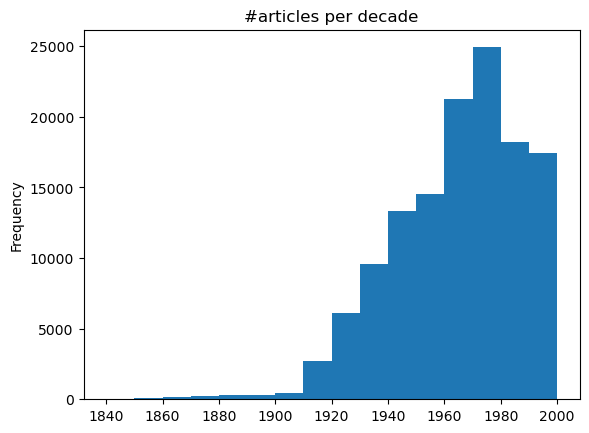

In [21]:
decades = list(range(1840, 2010, 10))
articles['decade'].plot.hist(bins=decades, title="#articles per decade")

In [22]:
articles['decade'].value_counts()

1970    24928
1960    21286
1980    18204
1950    14560
1940    13350
1990    11461
1930     9606
1920     6129
2000     5998
1910     2677
1900      416
2010      365
1890      317
1880      308
1870      244
1860      156
1850       98
1840       50
1830       14
1810       11
1820        6
1800        5
1790        4
Name: decade, dtype: int64

<AxesSubplot: title={'center': '#articles per newspaper'}, xlabel='newspaper'>

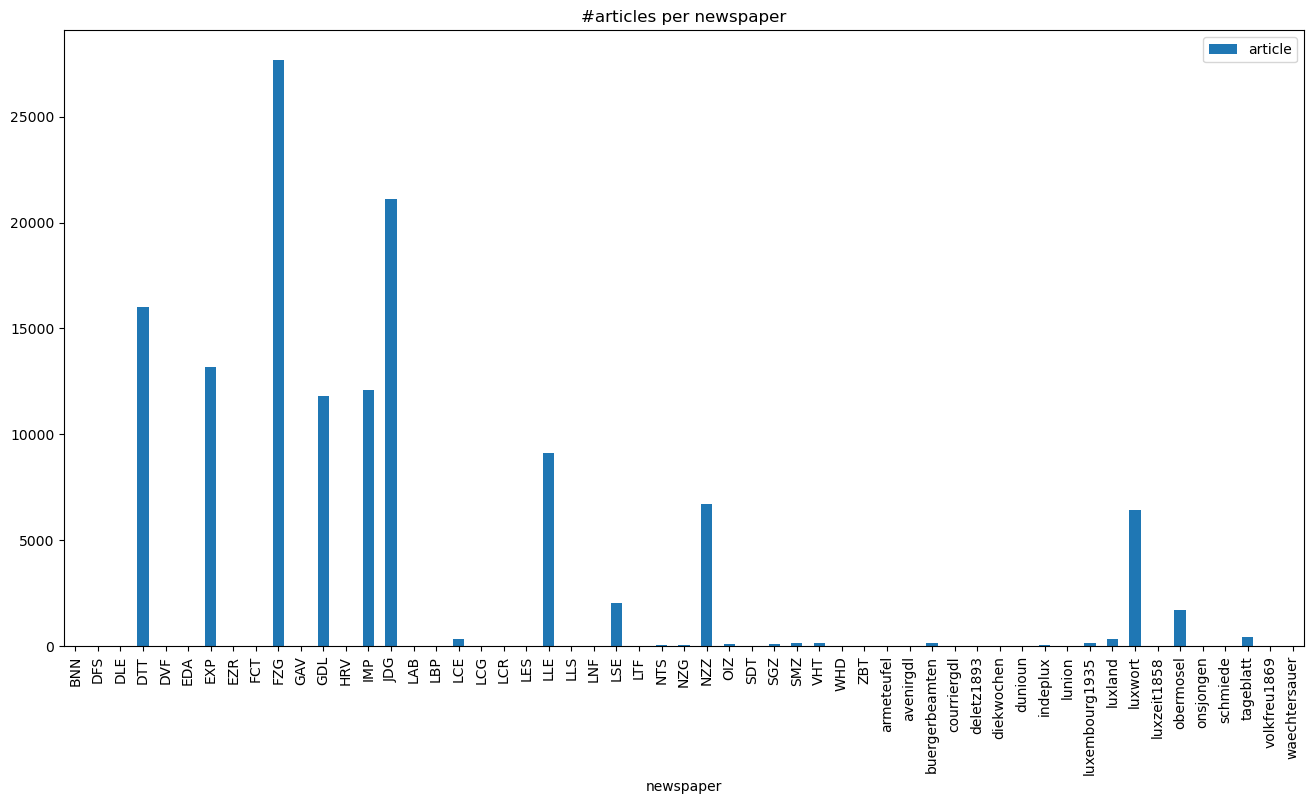

In [23]:
articles[['article', 'newspaper']].groupby('newspaper').count().plot.bar(figsize=(16,8), title="#articles per newspaper")

In [24]:
articles['newspaper'].value_counts()

FZG               27693
JDG               21114
DTT               16022
EXP               13164
IMP               12111
GDL               11805
LLE                9122
NZZ                6720
luxwort            6432
LSE                2017
obermosel          1695
tageblatt           439
luxland             337
LCE                 324
luxembourg1935      171
VHT                 156
SMZ                 148
buergerbeamten      130
OIZ                 105
SGZ                  93
indeplux             45
NTS                  40
NZG                  39
luxzeit1858          34
dunioun              30
BNN                  28
EZR                  22
courriergdl          19
volkfreu1869         11
lunion               11
waechtersauer        10
LCG                  10
armeteufel           10
DVF                   9
LAB                   9
WHD                   8
DLE                   7
LCR                   7
onsjongen             5
diekwochen            4
GAV                   4
LTF             

<AxesSubplot: title={'center': '#mentions per agency'}, xlabel='agency'>

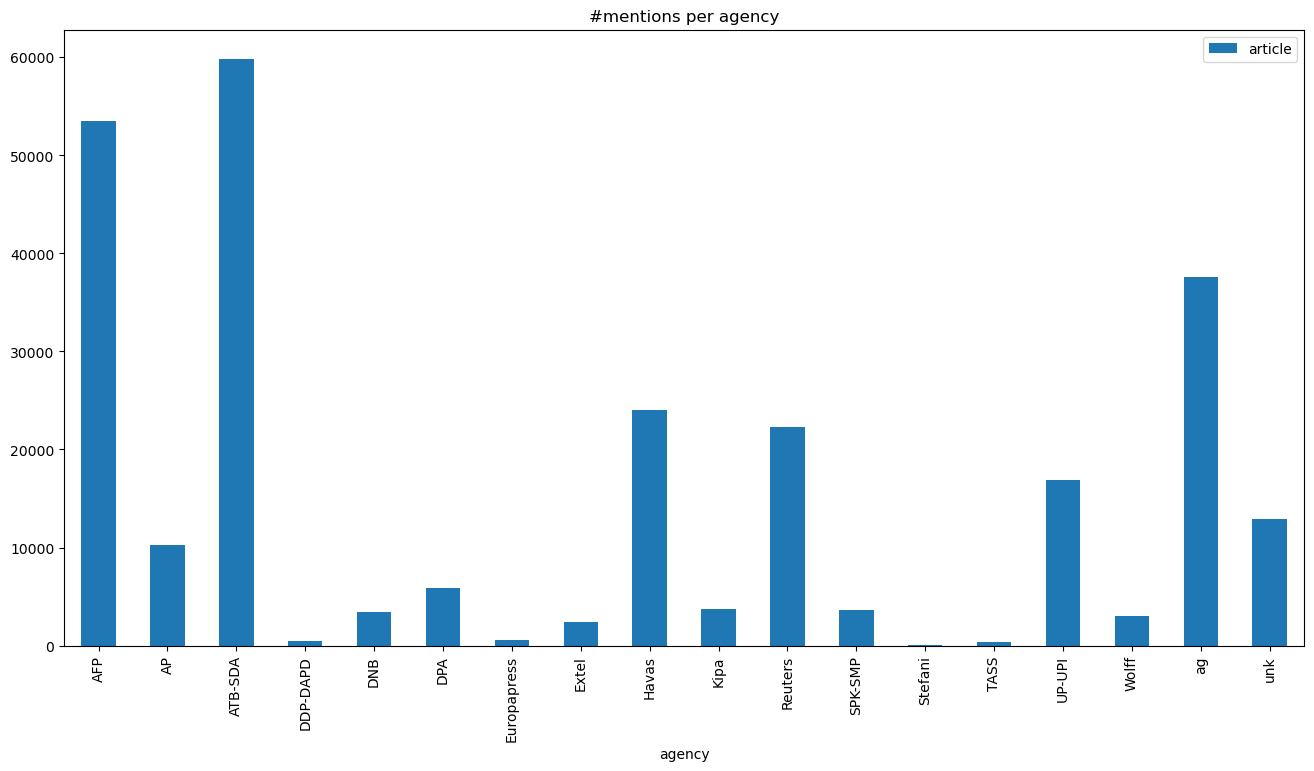

In [25]:
mentions_all[['article', 'agency']].groupby('agency').count().plot.bar(figsize=(16,8), title="#mentions per agency")

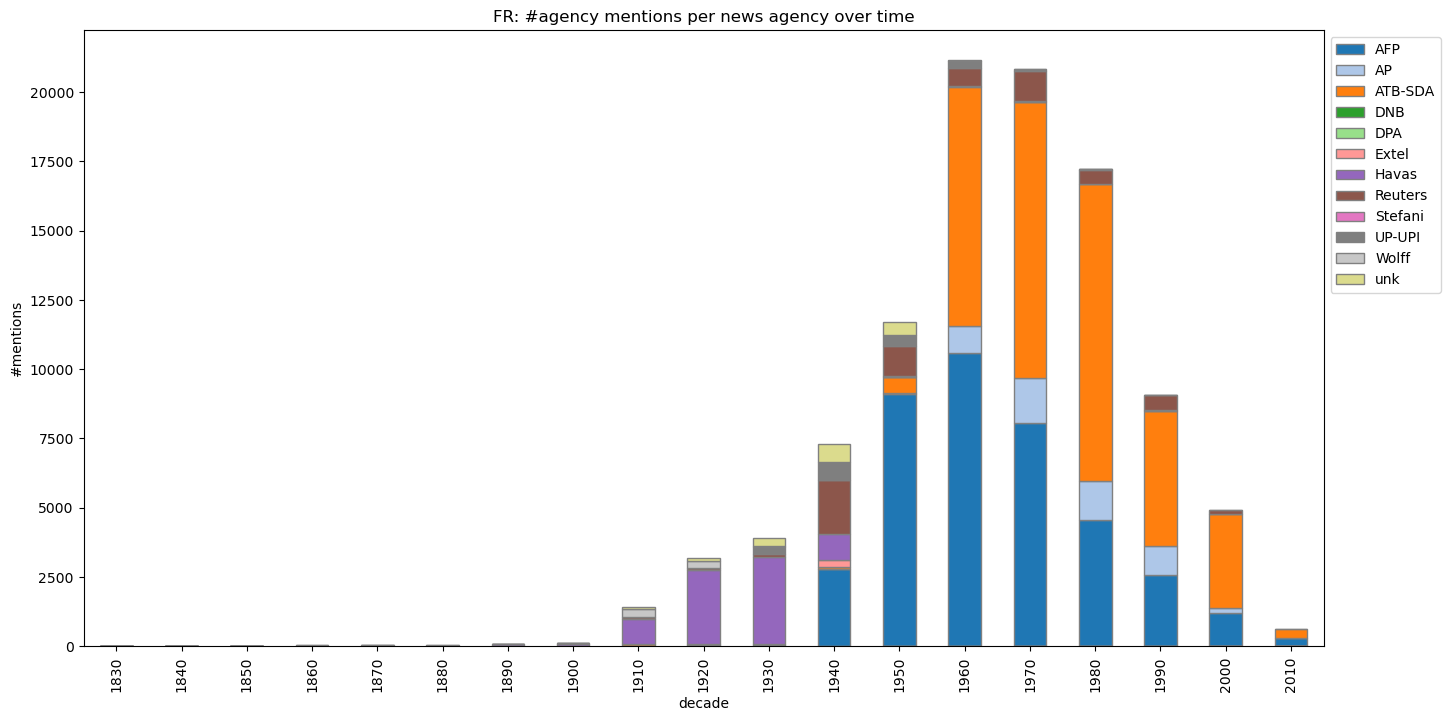

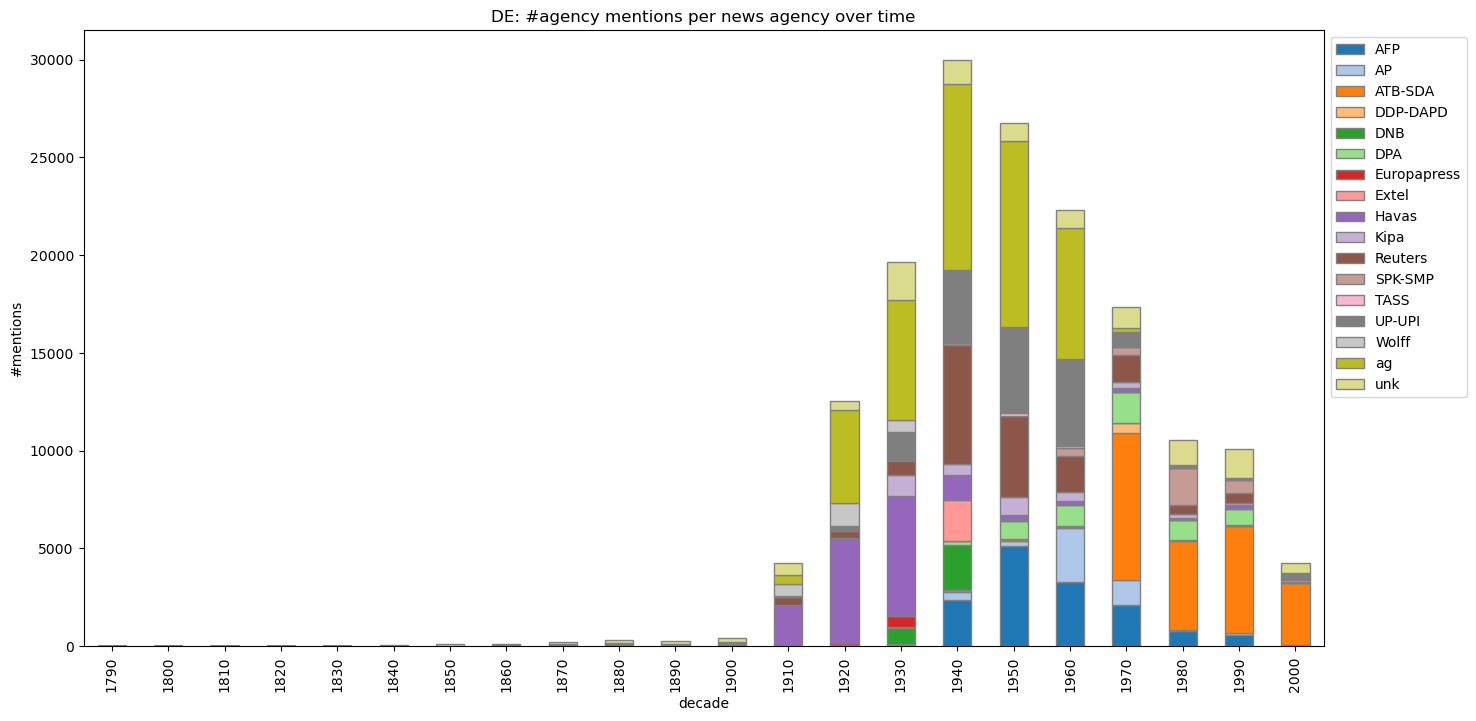

In [26]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

#French
na_per_decade_fr = pd.pivot_table(mentions_fr, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_fr.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="FR: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#German
na_per_decade_de = pd.pivot_table(mentions_de, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_de.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="DE: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Plot
plt.show()

In [27]:
print(f"#unique tokens classified as agency: {len(mentions_all['name'].unique())}")
print(f"Most common ones:\n{mentions_all['name'].value_counts()[:50]}")

#unique tokens classified as agency: 4614
Most common ones:
AFP             39174
ag .            30488
ATS             25410
Reuter          20386
sda             19134
Havas           18019
ats             12432
afp              7136
AP               5639
United Press     4974
UPI              4299
ap               3911
ag               3899
Kipa             3763
Wolff            2801
spk              2785
DNB              2739
dpa              2737
United Preß      2682
A . F . P .      2409
DPA              2367
Exchange         2348
ag )             1621
Afp              1225
Preß             1168
ATP              1110
UP                984
reuter            948
FN                906
Fournier          820
Agence            794
si                777
United            758
SDA               644
. P .             601
Bureau            587
Haoas             572
upi               540
ag (              489
ddp               489
Hauas             487
Europapreß        433
Ag              

## Multiple Agency Mentions per Article

## Save dataframes

In [28]:
pd.to_pickle(articles_fr, output_path + "articles_fr.pkl")
pd.to_pickle(articles_de, output_path + "articles_de.pkl")
pd.to_pickle(mentions_fr, output_path + "mentions_fr.pkl")
pd.to_pickle(mentions_de, output_path + "mentions_de.pkl")